In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Loading Data

In [17]:
# loading the Dataset
marketing_campaign_df = pd.read_csv('marketing_campaign.csv',sep='\t')

print(f'Number of the datapoints {marketing_campaign_df.shape[0]}')

Number of the datapoints 2240


In [18]:
marketing_campaign_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [19]:
marketing_campaign_df.shape

(2240, 29)

In [20]:
import time
import datetime as dt
import jdatetime as jd



def convert_gregorian_persian(df,date_col,format_date):
    
    df['persian_date'] = [jd.date.fromgregorian(date=dt.datetime.strptime(str(i),str(format_date))) for i in df[date_col]]
    df['gregorian_date'] = [dt.datetime.strptime(str(i), str(format_date)) for i in df[date_col]]
    df['gregorian_date'] = [dt.datetime.date(i) for i in df['gregorian_date']]
    df['persian_month'] = [jd.datetime.jmonth_short(i) for i in df['persian_date']]
    df['persian_weekday'] = [jd.datetime.jweekday_short(i) for i in df['persian_date']]
    
    return df

In [22]:
convert_gregorian_persian(marketing_campaign_df,'Dt_Customer','%d-%m-%Y')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,persian_date,gregorian_date,persian_month,persian_weekday
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,1391-06-14,2012-09-04,Sha,Tue
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,1392-12-17,2014-03-08,Esf,Sat
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,1392-05-30,2013-08-21,Mor,Wed
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,1392-11-21,2014-02-10,Bah,Mon
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,1392-10-29,2014-01-19,Dey,Sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,3,11,0,1392-03-23,2013-06-13,Kho,Thu
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,1,0,0,3,11,0,1393-03-20,2014-06-10,Kho,Tue
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,3,11,0,1392-11-05,2014-01-25,Bah,Sat
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,3,11,0,1392-11-04,2014-01-24,Bah,Fri


# 2.Data Cleaning

In [5]:
# Informatins on features
marketing_campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 2.1 Create Column info function for get information from data

In [6]:
def column_info(df):
    
    df1 = pd.concat([df.dtypes, df.isna().sum(),
               (df.isna().sum() / df.shape[0] * 100).map('% {:,.2f}'.format), df.nunique()],
              axis=1,keys=['dtype','no_of_nan','pct_of_nan', 'no_of_uniques'])
    return df1

In [7]:
column_info(marketing_campaign_df)

,dtype,no_of_nan,pct_of_nan,no_of_uniques
ID,int64,0,% 0.00,2240
Year_Birth,int64,0,% 0.00,59
Education,object,0,% 0.00,5
Marital_Status,object,0,% 0.00,8
Income,float64,24,% 1.07,1974
Kidhome,int64,0,% 0.00,3
Teenhome,int64,0,% 0.00,3
Dt_Customer,object,0,% 0.00,663
Recency,int64,0,% 0.00,100
MntWines,int64,0,% 0.00,776


### 2.2 Drop Missing Values

In [8]:
marketing_campaign_df = marketing_campaign_df.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(marketing_campaign_df))

The total number of data-points after removing the rows with missing values are: 2216


In [9]:
marketing_campaign_df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [10]:
# marketing_campaign_df.notna().sum()

# 3.Feature Engineering

### 3.1.Change dtype of Dt_Customer to Datetime 

In [13]:
marketing_campaign_df["Dt_Customer"] = pd.to_datetime(marketing_campaign_df["Dt_Customer"])
dates = []
for v in  marketing_campaign_df["Dt_Customer"]:
    v = v.date()
    dates.append(v)
    
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))


The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


### 3.2.Create Customer_For Column

In [40]:
days = []
d1 = max(dates)
for i in dates:
    delta = d1 - i
    days.append(delta)
    
marketing_campaign_df["Customer_For"] = days
marketing_campaign_df["Customer_For"] = pd.to_numeric(marketing_campaign_df["Customer_For"], errors="coerce")

In [41]:
marketing_campaign_df["Customer_For"].dtype

dtype('int64')

In [26]:
print("Total categories in the feature Marital_Status:\n", marketing_campaign_df["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", marketing_campaign_df["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


### 3.3.Age of customer in 2014

In [39]:
#Feature Engineering

marketing_campaign_df["Year_Birth"]
marketing_campaign_df["Age"] = max(dates).year-marketing_campaign_df["Year_Birth"]

### 3.4.Total spendings on various items


In [44]:
marketing_campaign_df["marketing_campaign_df"] = marketing_campaign_df[["MntWines",
                                                                        "MntFruits",
                                                                        "MntMeatProducts",
                                                                        "MntFishProducts",
                                                                        "MntSweetProducts",
                                                                        "MntGoldProds"]].sum(axis=1)

### 3.5.Deriving living situation by marital status"Alone"

In [24]:
marketing_campaign_df["Living_With"]=marketing_campaign_df["Marital_Status"].replace(
                                                    {"Married":"Partner",
                                                     "Together":"Partner",
                                                     "Absurd":"Alone",
                                                     "Widow":"Alone",
                                                     "YOLO":"Alone",
                                                     "Divorced":"Alone",
                                                     "Single":"Alone",})

### 3.6.Feature indicating total children living in the household

In [25]:
marketing_campaign_df["Children"] = marketing_campaign_df["Kidhome"]+marketing_campaign_df["Teenhome"]

In [27]:
marketing_campaign_df['Family_Size'] = marketing_campaign_df['Living_With'].replace({'Alone':1,'Partner':2}) + marketing_campaign_df["Children"]

In [30]:
marketing_campaign_df[['Family_Size']].describe()

,Family_Size
count,2216.000000
mean,2.592509
std,0.905722
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,5.000000


/home/sinanazem/anaconda3/envs/sparkenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family_Size'>

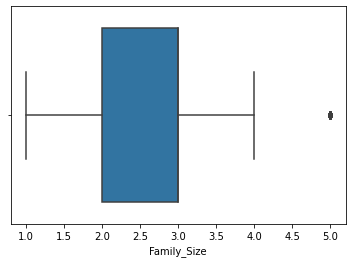

In [31]:
sns.boxplot(marketing_campaign_df['Family_Size'])

In [32]:
marketing_campaign_df["Children"] 

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2216, dtype: int64

In [33]:
marketing_campaign_df['Family_Size'] 

0       1
1       3
2       2
3       3
4       3
       ..
2235    3
2236    5
2237    1
2238    3
2239    4
Name: Family_Size, Length: 2216, dtype: int64

In [42]:
marketing_campaign_df['Is_Parent'] = np.where(marketing_campaign_df.Children > 0 , 1,0)

In [43]:
marketing_campaign_df['Is_Parent'] 

0       0
1       1
2       0
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Is_Parent, Length: 2216, dtype: int64

In [ ]:
df["Education"]=df["Education"].replace(
                                            {"Basic":"Undergraduate",
                                             "2n Cycle":"Undergraduate",
                                             "Graduation":"Graduate",
                                             "Master":"Postgraduate",
                                             "PhD":"Postgraduate"})

In [45]:
df=df.rename(
                columns={"MntWines": "Wines",
                         "MntFruits":"Fruits",
                         "MntMeatProducts":"Meat",
                         "MntFishProducts":"Fish",
                         "MntSweetProducts":"Sweets",
                         "MntGoldProds":"Gold"})

NameError: name 'df' is not defined